<font face="Verdana" size=5 color=#A52A2A > 1.K-Mean Clustering

/Users/zhaotianfeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


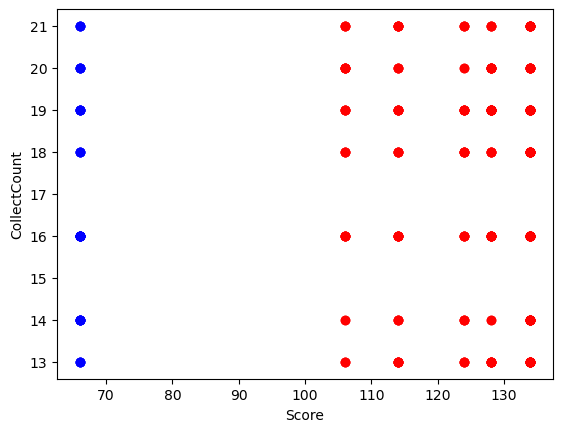

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data from CSV file
data = pd.read_csv('new_generated.csv')
X = data[['Score', 'CollectCount']].values

# Perform clustering with K-Means
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Add the labels as a new column in the original data frame
data['Performance'] = labels

# Save the labeled data to a new CSV file
data.to_csv('labeled_data.csv', index=False)

# Visualize the results
colors = ['red', 'blue']
for i in range(2):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], c=colors[i])
plt.xlabel('Score')
plt.ylabel('CollectCount')
plt.show()


<font face="Verdana" size=5 color=#A52A2A > 2.Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

data = pd.read_csv('labeled_data.csv')
# drop the attributes used for clustering.
data = data.drop('Score',axis=1)
data = data.drop('CollectCount',axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Performance',axis=1),
    data['Performance'], 
    test_size=0.2, 
    random_state=42
)

In [4]:
from sklearn import tree
# initialise the tree.
clf = tree.DecisionTreeClassifier()
# fit the tree.
clf = clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# set the tree critical parameter seeds.
param_grid = {
    'max_depth': [1, 3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Define the grid search object
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Train the grid search object on the training data
grid_search.fit(X_train, y_train)

importances = clf.feature_importances_

# Test the grid search object on the testing data
accuracy = grid_search.score(X_test, y_test)

print('Best parameters:', grid_search.best_params_)
print('Accuracy:', accuracy)

# print the correlations of each attributes with the key attribute. 
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")

Best parameters: {'max_depth': 1, 'min_samples_split': 2}
Accuracy: 0.8833333333333333
Feature 0: 0.04392791577685358
Feature 1: 0.01624460856739125
Feature 2: 0.0
Feature 3: 0.03220400187126208
Feature 4: 0.0
Feature 5: 0.10731707317073172
Feature 6: 0.031060228969636648
Feature 7: 0.0
Feature 8: 0.04054482103262592
Feature 9: 0.06736353077816491
Feature 10: 0.07174891675391154
Feature 11: 0.0
Feature 12: 0.0
Feature 13: 0.005026560804249686
Feature 14: 0.0
Feature 15: 0.027874564459930317
Feature 16: 0.14036391792489356
Feature 17: 0.04739057148813249
Feature 18: 0.06209565504326762
Feature 19: 0.0
Feature 20: 0.0
Feature 21: 0.03512195121951219
Feature 22: 0.016724738675958188
Feature 23: 0.0
Feature 24: 0.08664257898281263
Feature 25: 0.0
Feature 26: 0.0
Feature 27: 0.06380400725976788
Feature 28: 0.02129232470057257
Feature 29: 0.08325203252032522


In [5]:
from sklearn.datasets import load_iris
from sklearn import tree
# draw the visible tree.
iris = load_iris()
clf = clf.fit(iris.data, iris.target)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

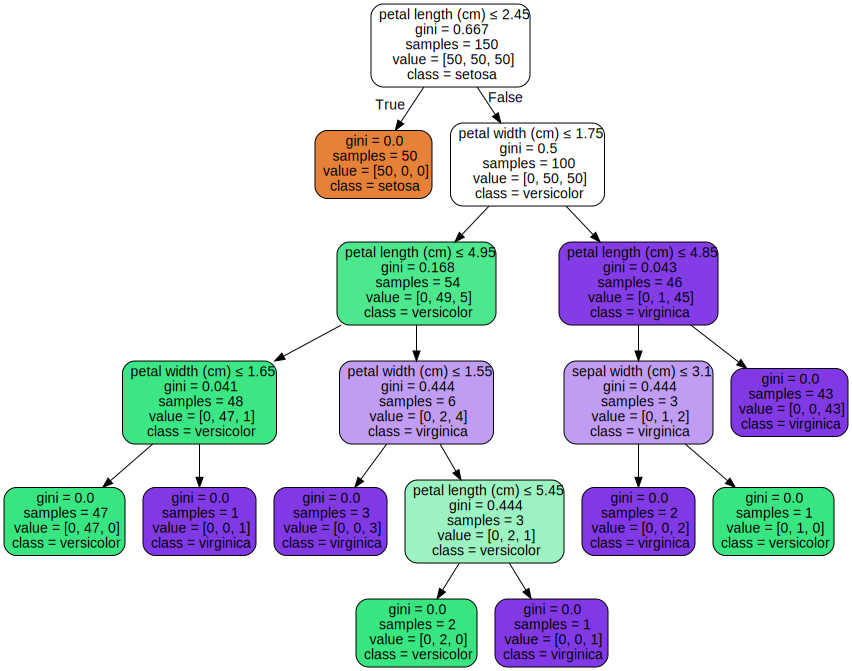

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [7]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# using another tree to verify the classification.
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
discrete_columns = ["point_one_speed","point_one_deviation","point_two_speed","point_two_deviation","point_three_speed","point_three_deviation",
"point_four_speed","point_four_deviation","point_five_speed","point_five_deviation","point_six_speed","point_six_deviation",
"point_seven_speed","point_seven_deviation","point_eight_speed","point_eight_deviation","point_nine_speed","point_nine_deviation",
"point_ten_speed","point_ten_deviation","point_eleven_speed","point_eleven_deviation","point_twelve_speed","point_twelve_deviation",
"point_thirteen_speed","point_thirteen_deviation","point_fourteen_speed","point_fourteen_deviation","point_fifteen_speed","point_fifteen_deviation","CollectCount","Score"
]
# print the correlations
for name,correlation in zip(discrete_columns,model.feature_importances_):
    print(name, ":", correlation)

point_one_speed : 0.03587643172832077
point_one_deviation : 0.03723241602554818
point_two_speed : 0.026663835707114482
point_two_deviation : 0.034132571541377804
point_three_speed : 0.03158088350746989
point_three_deviation : 0.029064866882033757
point_four_speed : 0.03174112487338044
point_four_deviation : 0.03988760931560408
point_five_speed : 0.03227365285242839
point_five_deviation : 0.03882426617478871
point_six_speed : 0.03605635273943323
point_six_deviation : 0.031090250422169
point_seven_speed : 0.024522047669380848
point_seven_deviation : 0.03027831609117043
point_eight_speed : 0.033225052744897725
point_eight_deviation : 0.03156681873012238
point_nine_speed : 0.03398196744049939
point_nine_deviation : 0.038319142481839756
point_ten_speed : 0.04814812883816935
point_ten_deviation : 0.03527525347112067
point_eleven_speed : 0.032977261295962776
point_eleven_deviation : 0.02920907693382464
point_twelve_speed : 0.03262863054211961
point_twelve_deviation : 0.031966933388499284
poin

<font face="Verdana" size=5 color=#A52A2A > 3. Neural Network

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif,VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from tensorflow import keras

2023-04-17 14:46:37.790858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
performance = pd.read_csv('labeled_data.csv',index_col=None)
performance.describe()

,point_one_speed,point_one_deviation,point_two_speed,point_two_deviation,point_three_speed,point_three_deviation,point_four_speed,point_four_deviation,point_five_speed,point_five_deviation,...,point_twelve_deviation,point_thirteen_speed,point_thirteen_deviation,point_fourteen_speed,point_fourteen_deviation,point_fifteen_speed,point_fifteen_deviation,CollectCount,Score,Performance
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.370312,31.596316,1.361623,26.536996,1.507014,30.782912,1.432875,25.846694,1.238932,37.311169,...,35.102309,1.724011,18.043483,1.804874,27.604323,1.670806,25.862137,17.243333,116.640000,0.140000
std,0.589315,17.317555,1.243097,17.808165,0.825180,18.332955,0.768101,11.743647,1.152693,21.552665,...,23.764483,0.900968,12.159980,0.793928,17.502831,1.411608,12.712666,2.650952,22.401409,0.347567
min,0.841993,10.612557,0.228964,13.712780,0.889602,9.590120,0.683298,8.791589,0.122040,12.444461,...,9.338154,0.538023,7.008839,0.756757,16.334832,0.629213,12.636836,13.000000,66.000000,0.000000
25%,1.031261,16.685405,0.644807,17.108218,0.933333,11.759828,0.949604,16.184478,0.548671,17.679052,...,13.693053,1.197073,9.054409,0.903226,17.233237,1.022528,14.114708,16.000000,114.000000,0.000000
50%,1.232281,32.946200,1.018901,18.842723,1.193147,29.587877,1.118034,24.554250,0.883946,29.810227,...,28.650617,1.446158,15.160261,1.744218,19.459735,1.050675,23.957687,18.000000,128.000000,0.000000
75%,1.353791,32.946200,1.063544,23.143192,1.489255,51.253763,1.460398,34.867388,1.339679,55.642772,...,38.244727,2.140535,17.377983,2.463120,32.236877,1.607053,29.600753,19.000000,134.000000,0.000000
max,2.626385,67.578231,4.316053,67.203442,3.328817,58.218105,3.274510,47.421370,4.054002,75.856844,...,77.289288,3.547875,45.470959,2.919236,78.150463,5.090909,52.169776,21.000000,134.000000,1.000000


In [10]:
emptyList = []
performanceColumn = performance.columns
print(performanceColumn)

for index, row in performance.iterrows():
    for name in performanceColumn:
        if row[name] == 0:
            performance.at[index,name]=performance[name].median()
temp = performance.drop(emptyList)
#reformative the data, make is continuous.
temp = temp.reset_index(drop=True)
performance = temp
performance.describe()

Index(['point_one_speed', 'point_one_deviation', 'point_two_speed',
       'point_two_deviation', 'point_three_speed', 'point_three_deviation',
       'point_four_speed', 'point_four_deviation', 'point_five_speed',
       'point_five_deviation', 'point_six_speed', 'point_six_deviation',
       'point_seven_speed', 'point_seven_deviation', 'point_eight_speed',
       'point_eight_deviation', 'point_nine_speed', 'point_nine_deviation',
       'point_ten_speed', 'point_ten_deviation', 'point_eleven_speed',
       'point_eleven_deviation', 'point_twelve_speed',
       'point_twelve_deviation', 'point_thirteen_speed',
       'point_thirteen_deviation', 'point_fourteen_speed',
       'point_fourteen_deviation', 'point_fifteen_speed',
       'point_fifteen_deviation', 'CollectCount', 'Score', 'Performance'],
      dtype='object')


,point_one_speed,point_one_deviation,point_two_speed,point_two_deviation,point_three_speed,point_three_deviation,point_four_speed,point_four_deviation,point_five_speed,point_five_deviation,...,point_twelve_deviation,point_thirteen_speed,point_thirteen_deviation,point_fourteen_speed,point_fourteen_deviation,point_fifteen_speed,point_fifteen_deviation,CollectCount,Score,Performance
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.370312,31.596316,1.361623,26.536996,1.507014,30.782912,1.432875,25.846694,1.238932,37.311169,...,35.102309,1.724011,18.043483,1.804874,27.604323,1.670806,25.862137,17.243333,116.640000,0.140000
std,0.589315,17.317555,1.243097,17.808165,0.825180,18.332955,0.768101,11.743647,1.152693,21.552665,...,23.764483,0.900968,12.159980,0.793928,17.502831,1.411608,12.712666,2.650952,22.401409,0.347567
min,0.841993,10.612557,0.228964,13.712780,0.889602,9.590120,0.683298,8.791589,0.122040,12.444461,...,9.338154,0.538023,7.008839,0.756757,16.334832,0.629213,12.636836,13.000000,66.000000,0.000000
25%,1.031261,16.685405,0.644807,17.108218,0.933333,11.759828,0.949604,16.184478,0.548671,17.679052,...,13.693053,1.197073,9.054409,0.903226,17.233237,1.022528,14.114708,16.000000,114.000000,0.000000
50%,1.232281,32.946200,1.018901,18.842723,1.193147,29.587877,1.118034,24.554250,0.883946,29.810227,...,28.650617,1.446158,15.160261,1.744218,19.459735,1.050675,23.957687,18.000000,128.000000,0.000000
75%,1.353791,32.946200,1.063544,23.143192,1.489255,51.253763,1.460398,34.867388,1.339679,55.642772,...,38.244727,2.140535,17.377983,2.463120,32.236877,1.607053,29.600753,19.000000,134.000000,0.000000
max,2.626385,67.578231,4.316053,67.203442,3.328817,58.218105,3.274510,47.421370,4.054002,75.856844,...,77.289288,3.547875,45.470959,2.919236,78.150463,5.090909,52.169776,21.000000,134.000000,1.000000


<Axes: xlabel='Performance', ylabel='count'>

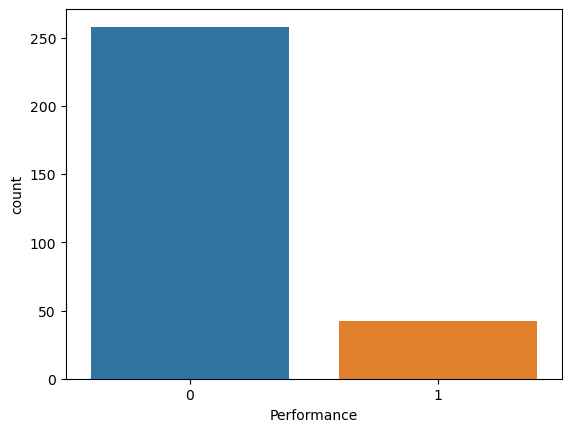

In [11]:
sns.countplot(x = 'Performance', data =performance)

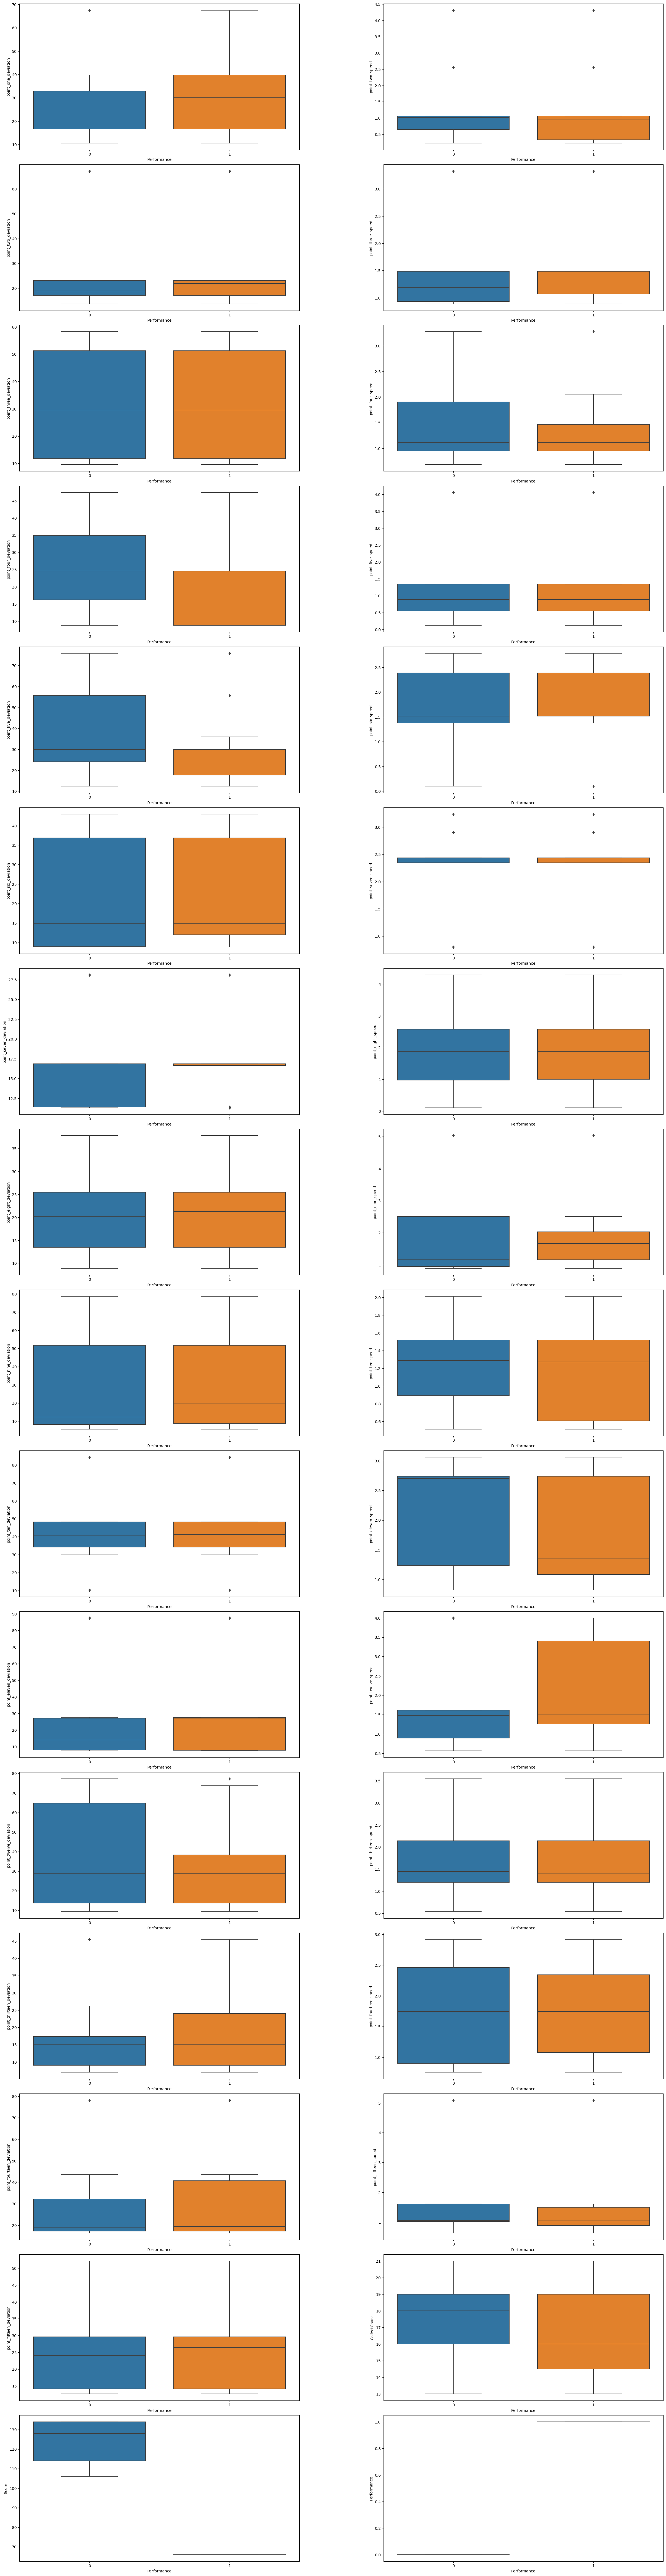

In [12]:
fig,axes=plt.subplots(nrows=16,ncols=2,figsize=(30,120))
fig.subplots_adjust(hspace=.10,wspace=.3)
axes=axes.ravel()

for i,col in enumerate(performance.columns[1:]):
   _=sns.boxplot(y=col,x='Performance',data=performance,ax=axes[i])

In [13]:
corrMatt = performance.corr()
#Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(200, 120))
plt.title('Point Performance Correlation')
#Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
           ax=ax, annot=True, fmt='.2g', linewidths=1)

<Axes: title={'center': 'Point Performance Correlation'}>

In [14]:
# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load the dataset
performance = pd.read_csv('labeled_data.csv')
performance = performance.astype(np.float32)
# Preprocess the data
X = performance.drop(columns=['Performance'])
X = performance.drop(columns=['Score'])
X = performance.drop(columns=['CollectCount'])
y = performance['Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

# Define the neural network architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Evaluate the model on test data
scores = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %.2f%%' % (scores[1]*100))

2023-04-17 14:46:54.766325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7278
Epoch 2/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7556
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7556
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7556
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7722
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8111
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8167
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7944
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8333
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accura

In [15]:
new_data = pd.read_csv('labeled_data.csv')
X_new = new_data.drop(columns=['Performance']).values
y_true = new_data['Performance'].values
y_pred = model.predict(X_new)

loss, accuracy = model.evaluate(X_new, y)
print('Loss:', loss)
print('Accuracy:', accuracy)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
print('Confusion matrix:')
print(confusion)

10/10 [==============================] - 0s 762us/step - loss: 0.0000e+00 - accuracy: 0.8600
Loss: 0.0
Accuracy: 0.8600000143051147
Confusion matrix:
[[258   0]
 [ 42   0]]


In [16]:
import tensorflow as tf
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('labeled_data.csv')

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_df = df[:train_size]
val_df = df[train_size:]

# Define the input and output dimensions
input_dim = len(df.columns) - 1
output_dim = 1

# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[input_dim]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_dim)
])

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the model
history = model.fit(train_df.iloc[:, :-1], train_df.iloc[:, -1], epochs=50,
                    validation_data=(val_df.iloc[:, :-1], val_df.iloc[:, -1]))

# Get the model's predictions on the validation set
predictions = model.predict(val_df.iloc[:, :-1])

# Calculate the correlation coefficient between each input feature and the target variable
corr_coef = []
for i in range(input_dim):
    corr_coef.append(val_df.iloc[:, i].corr(val_df.iloc[:, -1]))

# Print the correlation coefficients
for i, col in enumerate(val_df.columns[:-1]):
    print(f"{col} correlation coefficient: {corr_coef[i]}")



Epoch 1/50
8/8 [==============================] - 0s 12ms/step - loss: 88.6573 - val_loss: 48.9828
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 34.8612 - val_loss: 38.8454
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 23.0101 - val_loss: 15.6585
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 13.6295 - val_loss: 10.9264
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 8.6601 - val_loss: 9.6838
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 6.3322 - val_loss: 6.5543
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 5.9928 - val_loss: 5.8781
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 4.4557 - val_loss: 4.6813
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 3.7542 - val_loss: 4.3796
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 3.0656 - val_loss: 3.8163
Epoch 11/50
8/8 [=============